<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Accent')
sns.set_style('white')

import pandas as pd
import numpy as np
import warnings

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

warnings.filterwarnings(action='once')

## O Dataset e o Projeto

<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar modelos de <b>Machine Learning</b> companhando diversas técnicas. No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Esse projeto foi construído com base em um curso da Alura e utiliza um notebook parcialmente feito pela instituição.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura e entendimento dos dados

In [2]:
dados = pd.read_csv('../Dados/Consumo_cerveja.csv', sep=';')
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [3]:
# Verificando as dimensões do dataset
dados.shape

(365, 7)

In [4]:
# Verificando os tipos das variáveis
dados.dtypes

data           object
temp_media    float64
temp_min      float64
temp_max      float64
chuva         float64
fds             int64
consumo         int64
dtype: object

In [5]:
# Verificando porcentagem de valores missing
(dados.isnull().sum() / len(dados)) * 100

data          0.0
temp_media    0.0
temp_min      0.0
temp_max      0.0
chuva         0.0
fds           0.0
consumo       0.0
dtype: float64

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

In [7]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


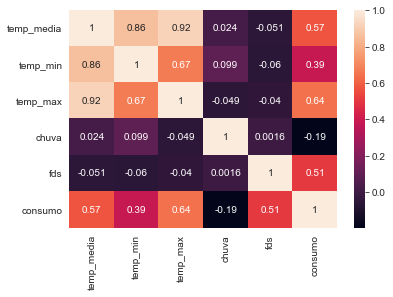

In [8]:
sns.heatmap(dados.corr(), annot=True)

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Observa-se correlações como esperado entre o consumo e as features. </p>

# <font color='red' style='font-size: 30px;'>Comportamento do target (consumo)</font>
<hr style='border: 2px solid red;'>

## Análises gráficas gerais

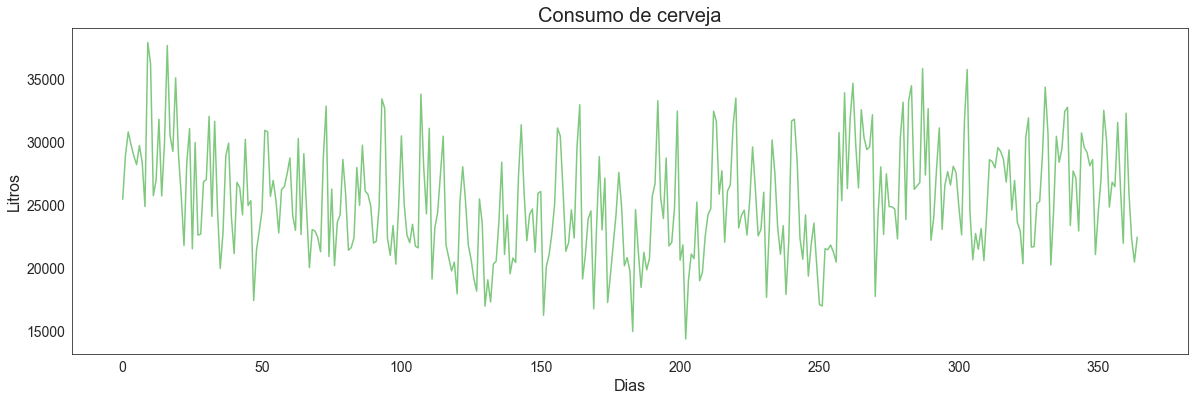

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

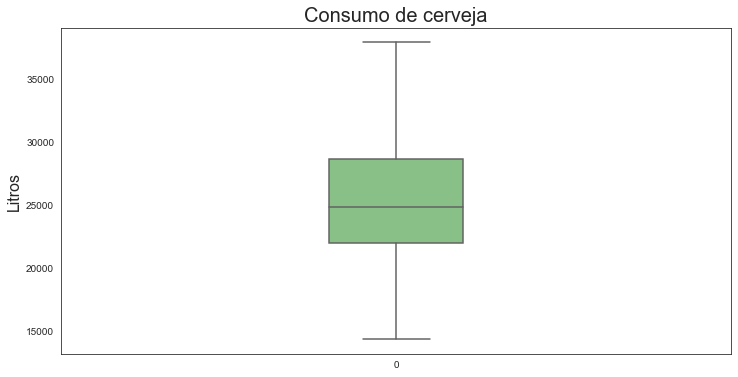

In [10]:
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Não foram verificados outliers no consumo. </p>

## Distribuição de frequências

C:\Users\julio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


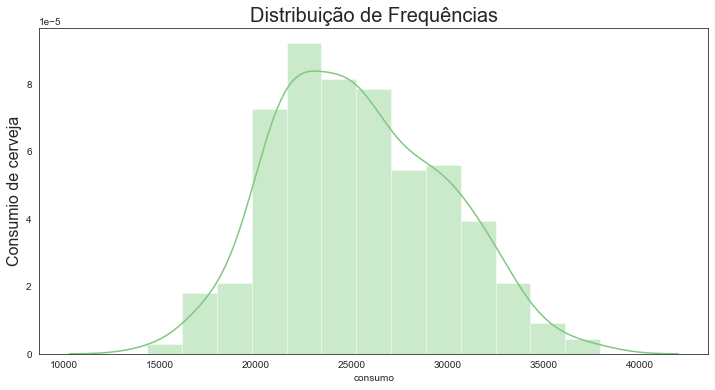

In [11]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumio de cerveja', fontsize=16)
ax

## Gráficos de dispersão entre as features e o target

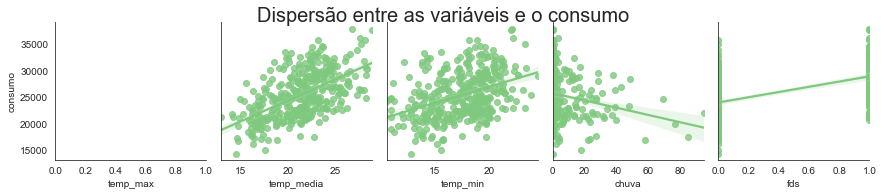

In [12]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_max', 'temp_media', 'temp_min', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis e o consumo', fontsize=20, y=1.05)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Uma outra visualização entre consumo x fds, para entender melhor a correlação.

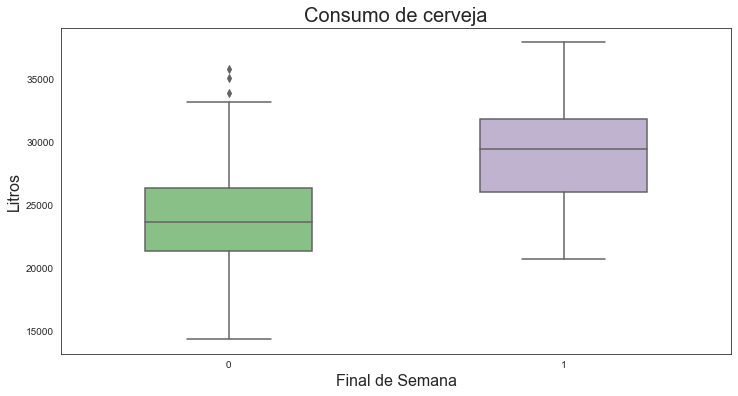

In [13]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Observa-se que nos finais de semana consome-se mais cerveja.</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Existem alguns outliers na semana, provavelmente por se tratar de algum feriado ou de sextas-feiras.</p>

# <font color='red' style='font-size: 30px;'>Entendendo a feature (temp_max) com maior correlação com o consumo</font>
<hr style='border: 2px solid red;'>

## Plots com a reta de regressão estimada

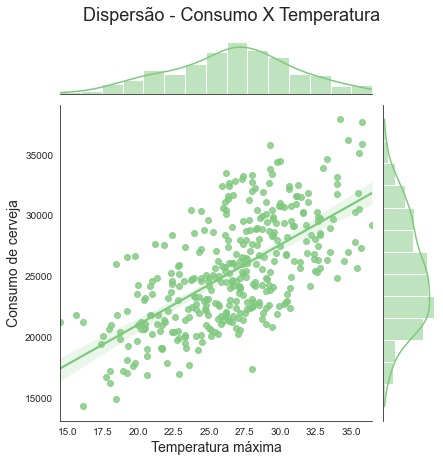

In [14]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura máxima', 'Consumo de cerveja', fontsize=14)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Com essa visualização é possível verificar (como já entendido com as correlações) que o aumento da temperatura máxima faz com que o consumo de cerveja aumente.
</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Além disso, verifica-se que a maior concentração de temperatura está na faixa de 27 graus e a maior concentração de consumo de cerveja está na faixa de 22 mil litros por dia.
</p>

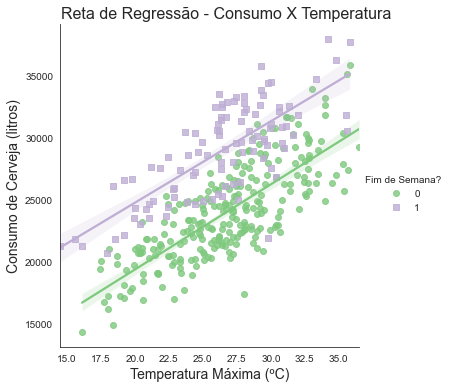

In [15]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds', markers=['o', 's'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima (ºC)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax.add_legend(title='Fim de Semana?')
ax

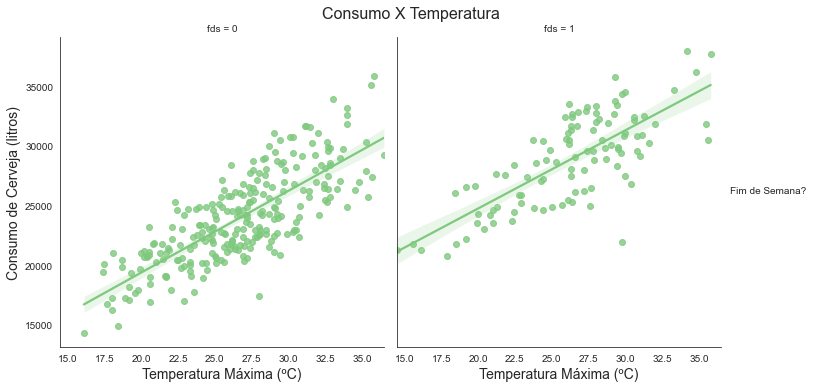

In [16]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, col='fds')
ax.fig.suptitle('Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels('Temperatura Máxima (ºC)', fontsize=14)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize=14)
ax.add_legend(title='Fim de Semana?')
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Levando em conta o final de semana, além da temperatura máxima, a regressão estimada é aparentemente mais precisa. É uma tendência que nos finais de semana se consuma mais cerveja que nos dias de semana dada a mesma temperatura.
</p>

# <font color='red' style='font-size: 30px;'>Estimando Modelos de Regressão para o Consumo</font>
<hr style='border: 2px solid red;'>

## Preparação dos dados

In [17]:
y = dados['consumo']

Não faz sentido usar como feature três indicações de temperatura. Foi escolhida a temperatura máxima por ser a com maior correlação.

In [18]:
x = dados[['temp_max', 'chuva', 'fds']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [20]:
metricas = pd.DataFrame(columns=['Modelo', 'MSE', 'RMSE', 'R²'])
metricas

,Modelo,MSE,RMSE,R²


## *LinearRegression*

In [21]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)
y_previsto = modelo.predict(x_test)

In [22]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694


## *Ridge*

In [23]:
modelo = Ridge()
modelo.fit(x_train, y_train)
y_previsto = modelo.predict(x_test)

In [24]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695


## *Lasso*

In [25]:
modelo = Lasso()
modelo.fit(x_train, y_train)
y_previsto = modelo.predict(x_test)

In [26]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694


## *ElasticNet*

In [27]:
modelo = ElasticNet()

valores = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.7, 0.8, 0.9, 1.0]
}
search = GridSearchCV(estimator=modelo, param_grid=valores, cv=5, n_jobs=-1)
search.fit(x_train, y_train)
y_previsto = search.predict(x_test)
print('Melhor Score:', search.best_score_)
print('Melhor Alpha:', search.best_estimator_.alpha)
print('Melhor l1 ratio:', search.best_estimator_.l1_ratio)

Melhor Score: 0.7062395331641784
Melhor Alpha: 0.05
Melhor l1 ratio: 0.9


In [28]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696


## DecisionTree

In [29]:
modelo = DecisionTreeRegressor()

minimos_split = np.array([2, 3, 4, 5, 6, 7])
maximo_nivel = np.array([3, 4, 5, 6, 7, 9, 10, 11])
algoritmo = ['mse', 'friedman_mse', 'mae']
valores_grid = {'min_samples_split': minimos_split, 'max_depth': maximo_nivel, 'criterion': algoritmo}

search = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5, n_jobs=-1)
search.fit(x_train, y_train)
y_previsto = search.predict(x_test)

print('Mínimo split: ', search.best_estimator_.min_samples_split)
print('Máxima profundidade: ', search.best_estimator_.max_depth)
print('Algoritmo escolhido: ', search.best_estimator_.criterion)
print('Acurácia: ', search.best_score_)

Mínimo split:  5
Máxima profundidade:  4
Algoritmo escolhido:  mse
Acurácia:  0.6779137995376185


In [30]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696
4,DecisionTreeRegressor(),8425743.190,2902.713,0.575


## AdaBoost

In [31]:
modelo = AdaBoostRegressor()
valores_grid ={'learning_rate': np.array([0.3, 0.2, 0.1, 0.05])}
search = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5, n_jobs=-1)
search.fit(x_train, y_train)
y_previsto = search.predict(x_test)

print('Melhor taxa de aprendizagem: ', search.best_estimator_.learning_rate)
print('Acurácia: ', search.best_score_)

Melhor taxa de aprendizagem:  0.3
Acurácia:  0.6858407113084948


In [32]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696
4,DecisionTreeRegressor(),8425743.190,2902.713,0.575
5,AdaBoostRegressor(),7232418.868,2689.316,0.635


## Extra Trees

In [33]:
modelo = ExtraTreesRegressor()

criterion = ['mse', 'mae']
max_depth = np.array([3, 4, 5, 6])
min_samples_split = np.array([1, 2, 3, 4])
min_samples_leaf = np.array([1, 2, 3, 4])

valores_grid = {
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

search = GridSearchCV(estimator=modelo,
                      param_grid=valores_grid,
                      cv=5,
                      n_jobs=-1)
search.fit(x_train, y_train)
y_previsto = search.predict(x_test)

print('Melhor critério: ', search.best_estimator_.criterion)
print('Melhor profundidade máxima: ', search.best_estimator_.max_depth)
print('Melhor amostragem minima: ', search.best_estimator_.min_samples_split)
print('Melhor amostragem de ramos: ', search.best_estimator_.min_samples_leaf)
print('Acurácia: ', search.best_score_)

Melhor critério:  mse
Melhor profundidade máxima:  6
Melhor amostragem minima:  4
Melhor amostragem de ramos:  2
Acurácia:  0.7067338274986952


In [34]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696
4,DecisionTreeRegressor(),8425743.190,2902.713,0.575
5,AdaBoostRegressor(),7232418.868,2689.316,0.635
6,ExtraTreesRegressor(),7171136.050,2677.898,0.638


## GradientBoosting

In [35]:
modelo = GradientBoostingRegressor()

minimos_split = np.array([3, 4, 5, 6, 7])
maximo_nivel = np.array([2, 3, 5, 7, 9,])
minimo_leaf = np.array([3, 4, 5, 6])
valores_grid = {
    'min_samples_split': minimos_split,
    'max_depth': maximo_nivel,
    'min_samples_leaf': minimo_leaf
}

search = GridSearchCV(estimator=modelo,
                      param_grid=valores_grid,
                      cv=5,
                      n_jobs=-1)

search.fit(x_train, y_train)
y_previsto = search.predict(x_test)

print('Mínimo split: ', search.best_estimator_.min_samples_split)
print('Máxima profundidade: ', search.best_estimator_.max_depth)
print('Mínimo leaf: ', search.best_estimator_.min_samples_leaf)
print('R2: ', search.best_score_)

Mínimo split:  3
Máxima profundidade:  3
Mínimo leaf:  6
R2:  0.6826523081986984


In [36]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696
4,DecisionTreeRegressor(),8425743.190,2902.713,0.575
5,AdaBoostRegressor(),7232418.868,2689.316,0.635
6,ExtraTreesRegressor(),7171136.050,2677.898,0.638
7,GradientBoostingRegressor(),7484473.751,2735.777,0.622


## Random Forest

In [37]:
modelo = RandomForestRegressor()

minimos_split = np.array([3, 4, 5, 6, 7])
maximo_nivel = np.array([2, 3, 5, 7, 9,])
minimo_leaf = np.array([3, 4, 5, 6])
valores_grid = {
    'min_samples_split': minimos_split,
    'max_depth': maximo_nivel,
    'min_samples_leaf': minimo_leaf
}

search = GridSearchCV(estimator=modelo,
                      param_grid=valores_grid,
                      cv=5,
                      n_jobs=-1)

search.fit(x_train, y_train)
y_previsto = search.predict(x_test)

print('Mínimo split: ', search.best_estimator_.min_samples_split)
print('Máxima profundidade: ', search.best_estimator_.max_depth)
print('Mínimo leaf: ', search.best_estimator_.min_samples_leaf)
print('R2: ', search.best_score_)

Mínimo split:  4
Máxima profundidade:  5
Mínimo leaf:  3
R2:  0.699168316133194


In [38]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':modelo, 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696
4,DecisionTreeRegressor(),8425743.190,2902.713,0.575
5,AdaBoostRegressor(),7232418.868,2689.316,0.635
6,ExtraTreesRegressor(),7171136.050,2677.898,0.638
7,GradientBoostingRegressor(),7484473.751,2735.777,0.622
8,RandomForestRegressor(),7934873.250,2816.891,0.600


# <font color='red' style='font-size: 30px;'> Utilizando Tensorflow</font>
<hr style='border: 2px solid red;'>

In [39]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

C:\Users\julio\AppData\Roaming\Python\Python38\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\julio\AppData\Roaming\Python\Python38\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\julio\AppData\Roaming\Python\Python38\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated c

In [40]:
y = dados['consumo']

In [41]:
x = dados[['temp_max', 'chuva', 'fds']]
normalizador = StandardScaler()
x_norm = normalizador.fit_transform(x)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state=10)

In [43]:
model = keras.Sequential([
    layers.Dense(10000, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dense(10000, activation='relu'),
    layers.Dense(1)
])

## RMSprop

In [44]:
optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse', tf.keras.metrics.MeanSquaredError()])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             40000     
_________________________________________________________________
dense_1 (Dense)              (None, 10000)             100010000 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10001     
Total params: 100,060,001
Trainable params: 100,060,001
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/20
8/8 [==============================] - 5s 645ms/step - loss: 657190784.0000 - mae: 25270.2988 - mse: 657190784.0000 - mean_squared_error: 657190784.0000 - val_loss: 602743296.0000 - val_mae: 24151.7754 - val_mse: 602743296.0000 - val_mean_squared_error: 602743296.0000
Epoch 2/20
8/8 [==============================] - 5s 594ms/step - loss: 573585088.0000 - mae: 23576.1719 - mse: 573585088.0000 - mean_squared_error: 573585088.0000 - val_loss: 481258176.0000 - val_mae: 21521.9160 - val_mse: 481258176.0000 - val_mean_squared_error: 481258176.0000
Epoch 3/20
8/8 [==============================] - 5s 603ms/step - loss: 427105248.0000 - mae: 20252.5215 - mse: 427105248.0000 - mean_squared_error: 427105248.0000 - val_loss: 320419104.0000 - val_mae: 17449.5586 - val_mse: 320419104.0000 - val_mean_squared_error: 320419104.0000
Epoch 4/20
8/8 [==============================] - 5s 617ms/step - loss: 258033808.0000 - mae: 15594.9805 - mse: 258033808.0000 - mean_squared_error: 258033808.0

In [47]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

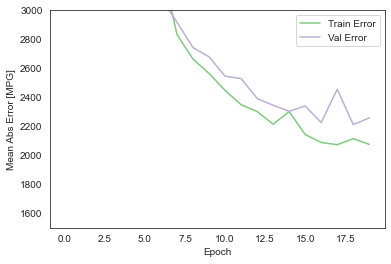

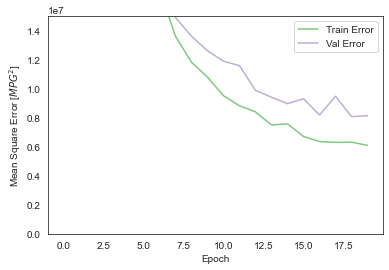

In [48]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
plt.ylim([1500, 3000])
plt.legend()

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [$MPG^2$]')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
plt.ylim([0, 15000000])
plt.legend()
plt.show()

In [49]:
y_previsto = model.predict(x_test).flatten()

In [50]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(3)
R2 = metrics.r2_score(y_test, y_previsto).round(3)

metricas = metricas.append({'Modelo':'TensorFlow RMSprop', 'MSE':EQM, 'RMSE':REQM, 'R²':R2}, ignore_index=True)
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696
4,DecisionTreeRegressor(),8425743.190,2902.713,0.575
5,AdaBoostRegressor(),7232418.868,2689.316,0.635
6,ExtraTreesRegressor(),7171136.050,2677.898,0.638
7,GradientBoostingRegressor(),7484473.751,2735.777,0.622
8,RandomForestRegressor(),7934873.250,2816.891,0.600
9,TensorFlow RMSprop,8149992.687,2854.819,0.589


# Comparando os modelos

In [53]:
metricas

,Modelo,MSE,RMSE,R²
0,LinearRegression(),6066751.892,2463.078,0.694
1,Ridge(),6037027.010,2457.036,0.695
2,Lasso(),6065291.680,2462.781,0.694
3,ElasticNet(),6029687.291,2455.542,0.696
4,DecisionTreeRegressor(),8425743.190,2902.713,0.575
5,AdaBoostRegressor(),7232418.868,2689.316,0.635
6,ExtraTreesRegressor(),7171136.050,2677.898,0.638
7,GradientBoostingRegressor(),7484473.751,2735.777,0.622
8,RandomForestRegressor(),7934873.250,2816.891,0.600
9,TensorFlow RMSprop,8149992.687,2854.819,0.589


In [54]:
metricas.sort_values('R²', ascending=False).reset_index(drop=True)

,Modelo,MSE,RMSE,R²
0,ElasticNet(),6029687.291,2455.542,0.696
1,Ridge(),6037027.010,2457.036,0.695
2,LinearRegression(),6066751.892,2463.078,0.694
3,Lasso(),6065291.680,2462.781,0.694
4,ExtraTreesRegressor(),7171136.050,2677.898,0.638
5,AdaBoostRegressor(),7232418.868,2689.316,0.635
6,GradientBoostingRegressor(),7484473.751,2735.777,0.622
7,RandomForestRegressor(),7934873.250,2816.891,0.600
8,TensorFlow RMSprop,8149992.687,2854.819,0.589
9,DecisionTreeRegressor(),8425743.190,2902.713,0.575


# <font color='red' style='font-size: 30px;'>Utilizando Pycaret</font>
<hr style='border: 2px solid red;'>

In [55]:
from pycaret.regression import setup, compare_models, models, create_model, tune_model, evaluate_model

In [56]:
# Não é necessário separar as features do target, pois o pycaret faz isso
dados2 = dados[['temp_max', 'chuva', 'fds', 'consumo']]

In [57]:
regressor = setup(data=dados2, target='consumo')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,2924
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(365, 4)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [58]:
best_regressor = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Ridge Regression,2095.8015,6025369.1925,2446.0352,0.6437,0.0955,0.0831,0.0019
1,Bayesian Ridge,2095.9002,6027125.5204,2446.3730,0.6437,0.0955,0.0831,0.0031
2,Lasso Regression,2096.4949,6025143.7882,2446.0267,0.6436,0.0955,0.0831,0.0027
3,Linear Regression,2096.5578,6025122.8179,2446.0272,0.6435,0.0955,0.0831,0.0024
4,Huber Regressor,2111.1873,6085696.6001,2458.7193,0.6389,0.0958,0.0834,0.0143
5,Random Sample Consensus,2120.4877,6181940.9100,2478.3339,0.6286,0.0962,0.0834,0.0485
6,Least Angle Regression,2198.4705,6900871.1694,2603.8521,0.6107,0.1020,0.0878,0.0023
7,Lasso Least Angle Regression,2200.2748,6922995.2082,2607.7840,0.6097,0.1022,0.0879,0.0024
8,AdaBoost Regressor,2180.0047,6875827.6788,2606.3526,0.6012,0.1034,0.0880,0.0403
9,Light Gradient Boosting Machine,2118.5422,6656958.9427,2570.8816,0.5990,0.1013,0.0842,0.0389


In [59]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [65]:
modelo = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2267.7804,6413240.4664,2532.4377,0.6805,0.1025,0.0934
1,2164.1218,5366326.0663,2316.5332,0.6496,0.0905,0.0847
2,2263.2092,7214992.9602,2686.0739,0.6289,0.0955,0.0803
3,2396.8552,7362700.6463,2713.4297,0.7150,0.1061,0.0967
4,2195.9201,6663751.8876,2581.4244,0.5401,0.0987,0.0863
5,1739.2788,4426226.4720,2103.8599,0.4595,0.0831,0.0671
6,2171.7200,6870340.8771,2621.1335,0.5876,0.1080,0.0956
7,1755.3423,4594901.9203,2143.5722,0.6670,0.0850,0.0696
8,2039.2373,5867588.0829,2422.3105,0.6932,0.0943,0.0788
9,1964.5502,5473622.5454,2339.5774,0.8158,0.0916,0.0780


In [66]:
tuned_model = tune_model(modelo, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2268.7257,6424782.2190,2534.7154,0.6800,0.1025,0.0934
1,2163.8249,5366509.9529,2316.5729,0.6496,0.0905,0.0847
2,2266.9149,7225119.2036,2687.9582,0.6283,0.0955,0.0804
3,2395.8892,7356256.6679,2712.2420,0.7153,0.1060,0.0967
4,2193.7659,6656065.4622,2579.9352,0.5406,0.0986,0.0862
5,1741.8290,4433649.8674,2105.6234,0.4586,0.0832,0.0672
6,2170.6975,6863672.1986,2619.8611,0.5880,0.1079,0.0955
7,1756.3223,4593472.3877,2143.2388,0.6671,0.0850,0.0696
8,2040.4414,5870066.4685,2422.8220,0.6931,0.0944,0.0788
9,1961.6686,5461980.8989,2337.0881,0.8162,0.0915,0.0779


In [67]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# <font color='red' style='font-size: 30px;'>Análises gráficas das previsões do melhor modelo</font>
<hr style='border: 2px solid red;'>

In [68]:
y = dados['consumo']

In [69]:
x = dados[['temp_max', 'chuva', 'fds']]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [71]:
modelo = ElasticNet(alpha=0.05, l1_ratio=0.9)

In [72]:
modelo.fit(x_train, y_train)
y_previsto = search.predict(x_test)

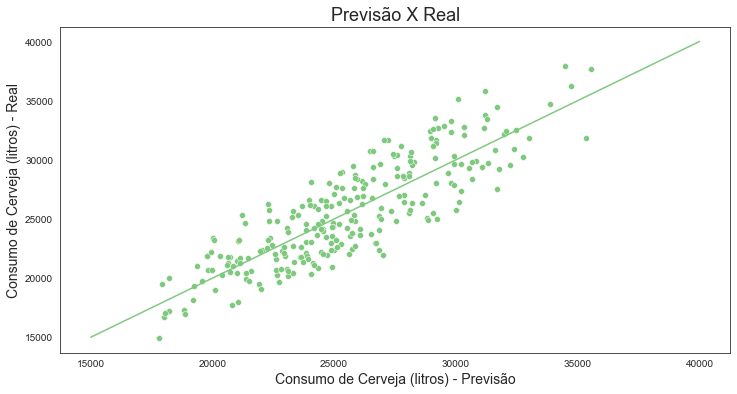

In [91]:
y_previsto_train = modelo.predict(x_train)

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax.plot([15000, 40000], [15000, 40000])
ax

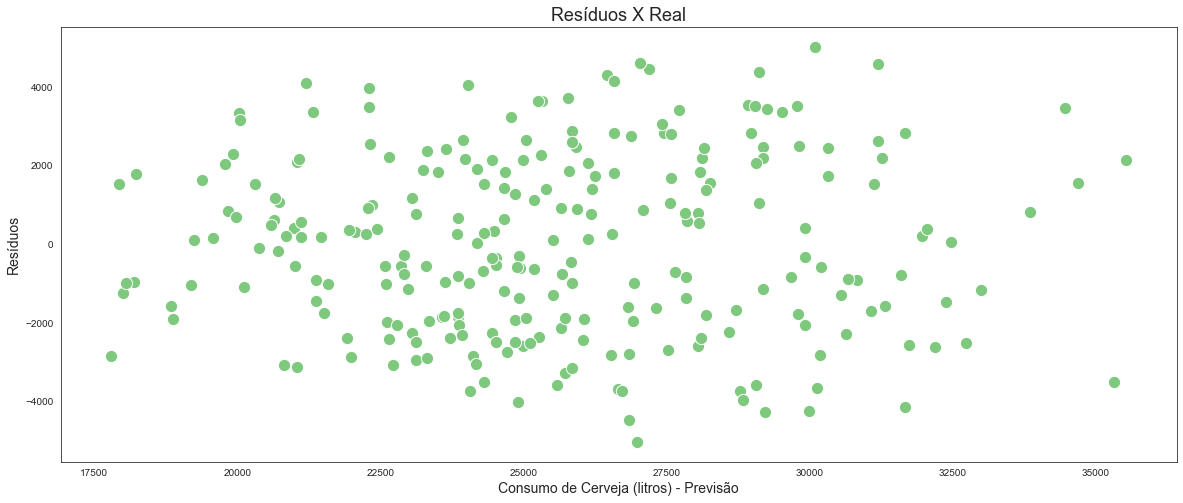

In [77]:
residuo = y_train - y_previsto_train

ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

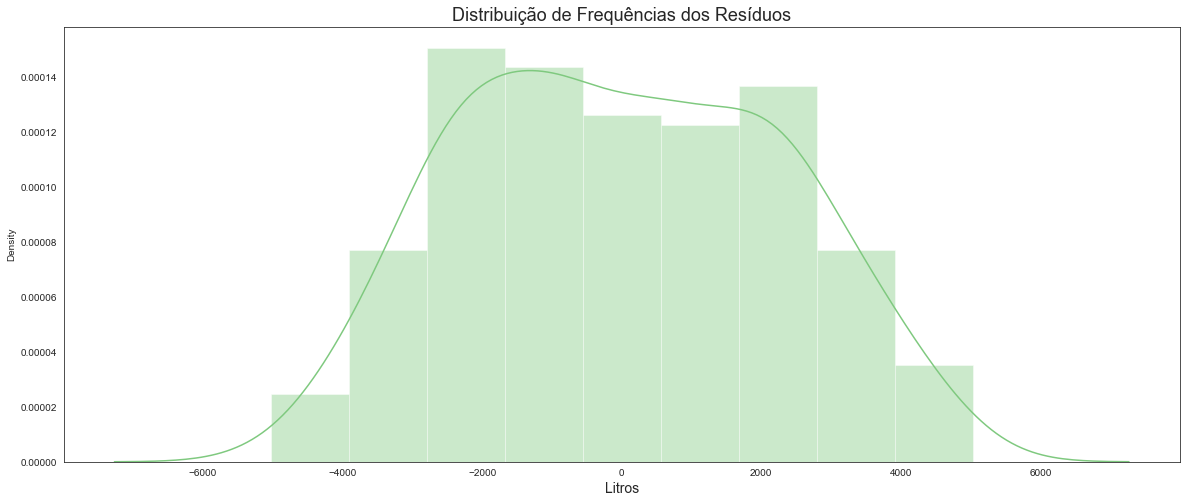

In [75]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

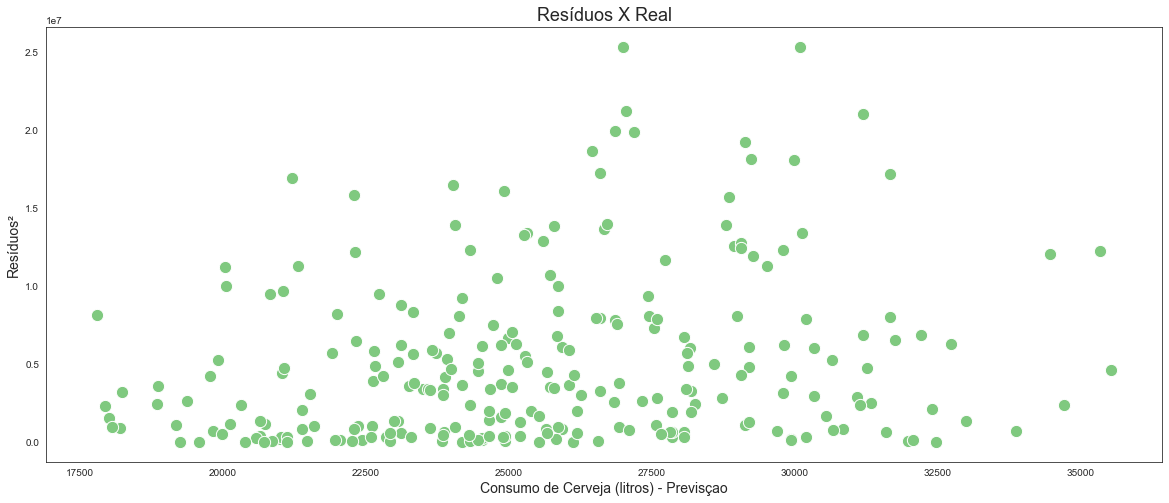

In [76]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsçao', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax